In [1]:
import os
import numpy as np
import numpy.testing as npt
import scipy.optimize as spo
import matplotlib.pyplot as plt

import lyaemu.likelihood as lyl

%matplotlib inline


In [ ]:
n_model_params = 3

def transfer_function_nCDM(k, alpha, beta, gamma):
    return lyl.transfer_function_nCDM(k, alpha, beta, gamma)


In [12]:
n_model_params = 1

def transfer_function_nCDM(k, alpha, beta):
    return lyl.transfer_function_nCDM(k, alpha, beta, -4.46)


In [9]:
n_model_params = 1

def transfer_function_nCDM(k, alpha):
    return lyl.transfer_function_nCDM(k, alpha, 2.12, -4.46)


In [14]:
n_spectra = 7
spectra_fname = [None] * 3
spectra_fname[0] = ['LCDM_matterpower_LCDM.dat', 'n0_10GeV_sigm25_matterpower.dat',
                 'n0_10GeV_sigm26_matterpower.dat', 'n0_10GeV_sigm27_matterpower.dat',
                 'n0_10GeV_sigm28_matterpower.dat', 'n0_10GeV_sigm29_matterpower.dat',
                 'n0_10GeV_sigm30_matterpower.dat']
log_sigma_cm2 = [-25., -26., -27., -28., -29., -30.]


In [15]:
spectra_fname[1] = ['LCDM_matterpower_LCDM.dat', None, 'n0_1GeV_sigm26_matterpower.dat',
                 'n0_1GeV_sigm27_matterpower.dat', 'n0_1GeV_sigm28_matterpower.dat',
                 'n0_1GeV_sigm29_matterpower.dat', 'n0_1GeV_sigm30_matterpower.dat'] #,
#log_sigma_cm2 = [-26., -27., -28., -29., -30.]


In [16]:
spectra_fname[2] = ['LCDM_matterpower_LCDM.dat', None, None, 'n0_10MeV_sigm27_matterpower.dat',
                 'n0_10MeV_sigm28_matterpower.dat', 'n0_10MeV_sigm29_matterpower.dat',
                 'n0_10MeV_sigm30_matterpower.dat'] #,
#log_sigma_cm2 = [-27., -28., -29., -30.]


[0.06714115] [0.00131634]
[0.01531568] [0.0020368]
[0.00351614] [0.00129003]
[0.00091036] [0.00132765]
[0.00023795] [0.00141606]
[6.26989593e-05] [0.00339703]
[0.05637271] [0.00615625]
[0.01257534] [0.00123926]


 /Users/keir/Software/lya_emulator/lyaemu/likelihood.py:94: RuntimeWarning:invalid value encountered in power
 /Users/keir/Software/lya_emulator/lyaemu/likelihood.py:94: RuntimeWarning:invalid value encountered in power
 /Users/keir/Software/lya_emulator/lyaemu/likelihood.py:94: RuntimeWarning:invalid value encountered in power
 /Users/keir/Software/lya_emulator/lyaemu/likelihood.py:94: RuntimeWarning:invalid value encountered in power
 /Users/keir/Software/lya_emulator/lyaemu/likelihood.py:94: RuntimeWarning:invalid value encountered in power
 /Users/keir/Software/lya_emulator/lyaemu/likelihood.py:94: RuntimeWarning:invalid value encountered in power


[0.00300393] [0.00158636]
[0.00082241] [0.00181824]
[0.00023162] [0.00209301]
[0.0410204] [0.00966258]
[0.00909257] [0.00086441]
[0.00232577] [0.00152469]


 /Users/keir/Software/lya_emulator/lyaemu/likelihood.py:94: RuntimeWarning:invalid value encountered in power
 /Users/keir/Software/lya_emulator/lyaemu/likelihood.py:94: RuntimeWarning:invalid value encountered in power
 /Users/keir/Software/lya_emulator/lyaemu/likelihood.py:94: RuntimeWarning:invalid value encountered in power


[0.00067933] [0.00224064]


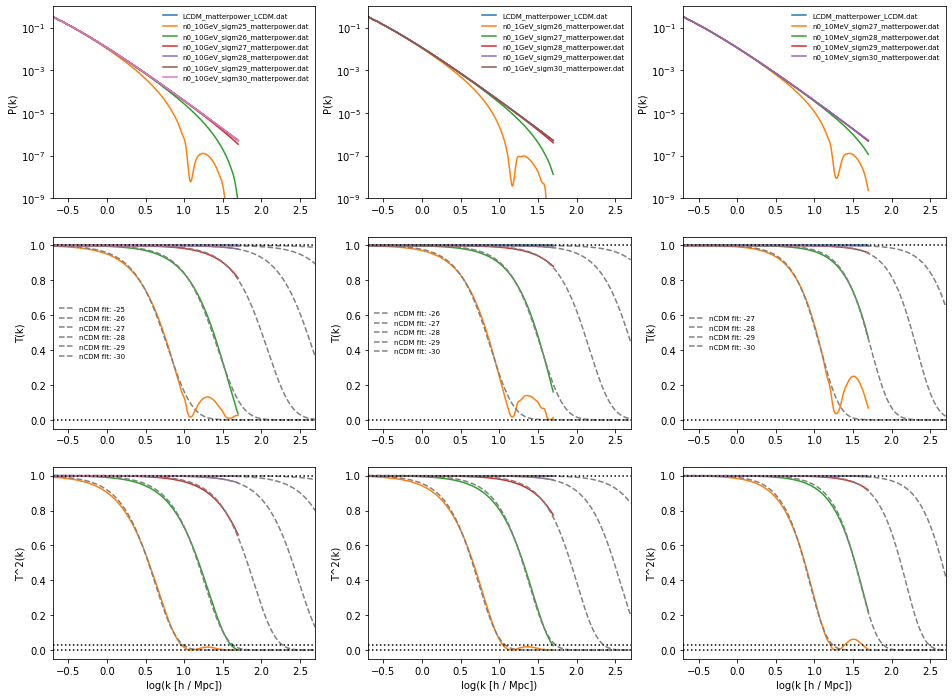

In [19]:
log_mass_eV = [10., 9., 7.]
beta_fit = [1.72, 1.83, 2.12]
fname_root = '/Users/keir/Simulations/bDM'
#'n0_100MeV_sig8p8m29_matterpower.dat']

fig, axes = plt.subplots(ncols=len(log_mass_eV), nrows=3, figsize=(16., 12.))
nCDM_parameters = np.zeros((len(log_mass_eV), 6, n_model_params))
nCDM_covariance = np.zeros((len(log_mass_eV), 6, n_model_params, n_model_params))
for m in range(len(log_mass_eV)):
    power_spectra = [None] * n_spectra
    for i in range(n_spectra):
        if spectra_fname[m][i] is None:
            continue
        power_spectra[i] = np.loadtxt(os.path.join(fname_root, spectra_fname[m][i]))
        npt.assert_array_equal(power_spectra[i][:, 0], power_spectra[0][:, 0])
        axes[0, m].plot(np.log10(power_spectra[i][:, 0]), power_spectra[i][:, 1], label=spectra_fname[m][i])
        transfer_func = np.sqrt(power_spectra[i][:, 1] / power_spectra[0][:, 1])
        axes[1, m].plot(np.log10(power_spectra[i][:, 0]), transfer_func)
        #print(transfer_func[-10:])
        axes[2, m].plot(np.log10(power_spectra[i][:, 0]), transfer_func ** 2.)

        if i > 0:
            #Fit nCDM parameters
            k_cut = power_spectra[i][:, 0] > 10. ** (-5.)
            if i == 1:
                k_cut *= power_spectra[i][:, 0] < 10. ** (1.)
            transfer_function_nCDM_beta_fit = lambda k, a: transfer_function_nCDM(k, a, beta_fit[m])
            nCDM_parameters[m, i-1, :], nCDM_covariance[m, i-1, :, :] = spo.curve_fit(transfer_function_nCDM_beta_fit,
                                                                power_spectra[i][:, 0][k_cut], transfer_func[k_cut],
                                                                p0=np.array([0.05]), maxfev=8000) #,
            #bounds=(-4.46, 10.))
            print(nCDM_parameters[m, i-1, :],
                  np.sqrt(np.diag(nCDM_covariance[m, i-1, :, :])) / nCDM_parameters[m, i-1, :])
            k_plot = np.linspace(-0.7, 2.7, num=1000)
            axes[1, m].plot(k_plot, transfer_function_nCDM_beta_fit(10. ** k_plot, *nCDM_parameters[m, i-1, :]), ls='--',
                         label='nCDM fit: %i'%log_sigma_cm2[i-1], color='grey')
            axes[2, m].plot(k_plot, transfer_function_nCDM_beta_fit(10. ** k_plot, *nCDM_parameters[m, i-1, :]) ** 2, ls='--',
                         label='nCDM fit: %i'%log_sigma_cm2[i-1], color='grey')
            #*np.array([0.015, 2.24, -4.46]) #np.log10(power_spectra[i][:, 0])

    axes[0, m].set_xlim([-0.7, 2.7])
    axes[0, m].set_ylim([1.e-9, 1.e+0])
    axes[1, m].set_xlim([-0.7, 2.7])
    axes[2, m].set_xlim([-0.7, 2.7])
    #axes[0].set_xscale('log')
    axes[0, m].set_yscale('log')
    #axes[1].set_yscale('log')
    #axes[1].set_xscale('log')
    axes[0, m].set_ylabel('P(k)')
    axes[1, m].set_ylabel('T(k)')
    axes[2, m].set_xlabel('log(k [h / Mpc])')
    axes[2, m].set_ylabel('T^2(k)')
    axes[1, m].axhline(y=0., ls=':', color='black')
    axes[1, m].axhline(y=1., ls=':', color='black')
    axes[2, m].axhline(y=0., ls=':', color='black')
    axes[2, m].axhline(y=0.03, ls=':', color='black')
    axes[2, m].axhline(y=1., ls=':', color='black')
    axes[0, m].legend(frameon=False, fontsize=7.)
    axes[1, m].legend(frameon=False, fontsize=7., loc='center left')
plt.show()


In [28]:
nCDM_parameters[nCDM_parameters == 0] = None


In [45]:
def alpha_model(sigma_mass, a, b, c, d, e):
    return (a * sigma_mass[0]) + (b * sigma_mass[1]) + c + (d * (sigma_mass[1] ** 2.)) + (e * (sigma_mass[0] ** 2.))


[[-25. -26. -27. -28. -29. -30. -25. -26. -27. -28. -29. -30. -25. -26.
  -27. -28. -29. -30.]
 [ 10.  10.  10.  10.  10.  10.   9.   9.   9.   9.   9.   9.   7.   7.
    7.   7.   7.   7.]]
[-1.17301124 -1.81486381 -2.45393417 -3.04078531 -3.62351638 -4.20273967
 -1.24893111 -1.90048038 -2.52231006 -3.08491082 -3.63521463 -1.3870001
 -2.04131324 -2.63343377 -3.16792135]
[ 1.24891276e+00  1.43686147e+00  1.88662350e+01 -1.04635747e-01
  1.16650067e-02] [ 0.09272351  0.05803454  0.08541499 -0.04707915  0.17843675]


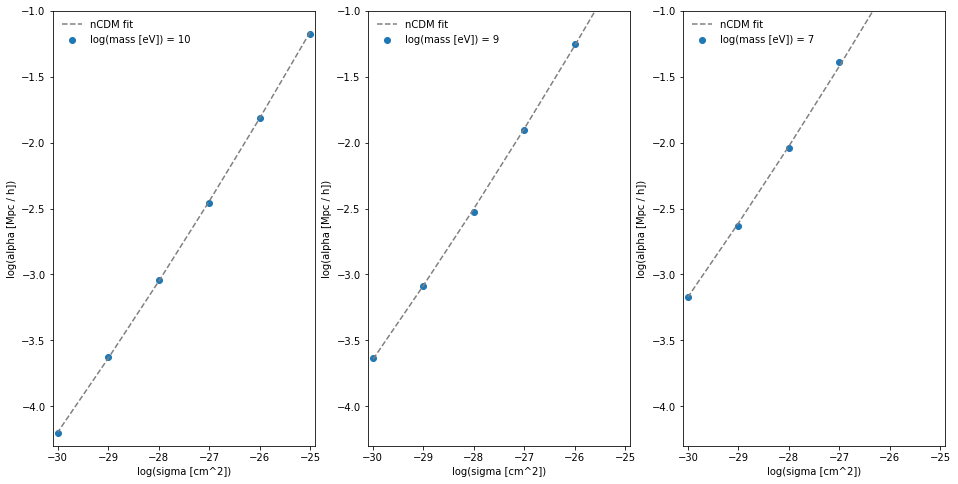

In [46]:
X1, X2 = np.meshgrid(log_sigma_cm2, log_mass_eV)
size = X1.shape
x1_1d = X1.reshape((1, np.prod(size)))
x2_1d = X2.reshape((1, np.prod(size)))
xdata = np.vstack((x1_1d, x2_1d))
print(xdata)

log_alpha = np.log10(nCDM_parameters.flatten())
print(log_alpha[~np.isnan(log_alpha)])

alpha_parameters, alpha_covariance = spo.curve_fit(alpha_model, xdata[:, ~np.isnan(log_alpha)],
                                                   log_alpha[~np.isnan(log_alpha)], maxfev=8000)
print(alpha_parameters, np.sqrt(np.diag(alpha_covariance)) / alpha_parameters)

fig, axes = plt.subplots(ncols=len(log_mass_eV), nrows=n_model_params, figsize=(16., 8.))
for m, mass in enumerate(log_mass_eV):
    axes[m].scatter(log_sigma_cm2, np.log10(nCDM_parameters[m, :, 0]), label='log(mass [eV]) = %i'%log_mass_eV[m])
    axes[m].plot(log_sigma_cm2, alpha_model(np.vstack((log_sigma_cm2, np.ones_like(log_sigma_cm2) * mass)),
                    *alpha_parameters), color='grey', ls='--', label='nCDM fit')
    #axes[1].scatter(log_sigma_cm2, nCDM_parameters[:, 1])
    axes[m].set_xlim([-30.1, -24.9])
    axes[m].set_ylim([-4.3, -1.])
    axes[m].set_xlabel('log(sigma [cm^2])')
    axes[m].set_ylabel('log(alpha [Mpc / h])')
    axes[m].legend(frameon=False)
plt.show()


In [55]:
def beta_model(mass, a, b): #, c):
    return (a * mass) + b #+ (c * (mass * 2.))


[-0.135  3.06 ] [-0.06415003  0.02478064]


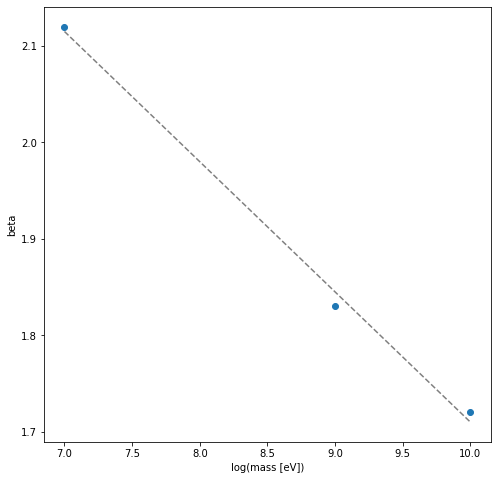

In [56]:
beta_parameters, beta_covariance = spo.curve_fit(beta_model, log_mass_eV, beta, maxfev=8000)
print(beta_parameters, np.sqrt(np.diag(beta_covariance)) / beta_parameters)

fig, axes = plt.subplots(ncols=1, nrows=n_model_params, figsize=(8., 8.))
log_mass_eV = [7., 9., 10.]
beta = [2.12, 1.83, 1.72]
axes.scatter(log_mass_eV, beta)
axes.plot(log_mass_eV, beta_model(np.array(log_mass_eV), *beta_parameters), color='grey', ls='--', label='nCDM fit')
axes.set_xlabel('log(mass [eV])')
axes.set_ylabel('beta')
plt.show()


In [ ]:
plt.plot(power_spectra[1][:, 0][k_cut], transfer_func[k_cut])
plt.plot(power_spectra[1][:, 0][k_cut],
         lyl.transfer_function_nCDM(power_spectra[1][:, 0][k_cut], *np.array([0.015, 2.24, -4.46])))
plt.show()
